<a href="https://colab.research.google.com/github/sds-capstone/2022-09-proj7-women-at-table/blob/demographics-and-fin48/CapstoneDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# imports 
import pandas as pd
# import pipe
import numpy as np
import seaborn as sns
from plotnine import *

In [ ]:
file = '/content/findex_SubSahAfrica.csv'
df = pd.read_csv(file, index_col=0)
print(f'There are {df.shape[0]} entries and {df.shape[1]} features')
df.head()

In [ ]:
#@title recoding values + variables

# demographic variables

dem_df = df[['educ', 'age', 'fin48', 'female', 'fin24']]

# recode fin48
dem_df.loc[dem_df['fin48'] == 1, "fin48"] = 'Yes'
dem_df.loc[dem_df['fin48'] == 2, "fin48"] = 'No'
dem_df.loc[dem_df['fin48'] == 3, "fin48"] = 'Don\'t Know'
dem_df.loc[dem_df['fin48'] == 4, "fin48"] = 'Refuse'

# recode fin24
dem_df.loc[dem_df['fin24'] == 1, "fin24"] = 'Yes'
dem_df.loc[dem_df['fin24'] == 2, "fin24"] = 'No'
dem_df.loc[dem_df['fin24'] == 3, "fin24"] = 'Don\'t Know'
dem_df.loc[dem_df['fin24'] == 4, "fin24"] = 'Refuse'


# recode educ values

dem_df.loc[dem_df['educ'] == 1, "educ"] = 'Primary'
dem_df.loc[dem_df['educ'] == 2, "educ"] = 'Secondary'
dem_df.loc[dem_df['educ'] == 3, "educ"] = 'Tertiary'
dem_df.loc[dem_df['educ'] == 4, "educ"] = 'Don\'t Know'
dem_df.loc[dem_df['educ'] == 5, "educ"] = 'Refuse'

# recode female values 

dem_df.loc[dem_df['female'] == 1, "female"] = 'Male'
dem_df.loc[dem_df['female'] == 2, "female"] = 'Female'

# rename variables 

dem_df.rename(columns = {'fin48': 'national_id', 'educ': 'education', 'female': 'gender', 'fin24': 'has_access'}, inplace = True)
dem_df.head()


Text(0.5, 0.98, 'Highest Education Level')

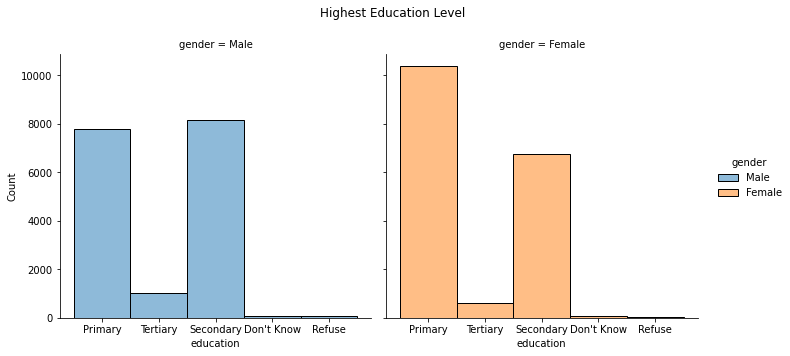

In [5]:
#@title Education by Gender
ebg = sns.displot(x="education", col= "gender", hue= "gender", data=dem_df)

ebg.fig.subplots_adjust(top=.85)
ebg.fig.suptitle('Highest Education Level')

We can see that more people who identify as female have had a primary education compared to those who  identify as male. However, more males have secondary and tertiary education, which means overall, males have a higher education compared to females. 

Text(0.5, 0.98, 'Access to Funds by Highest Education Level')

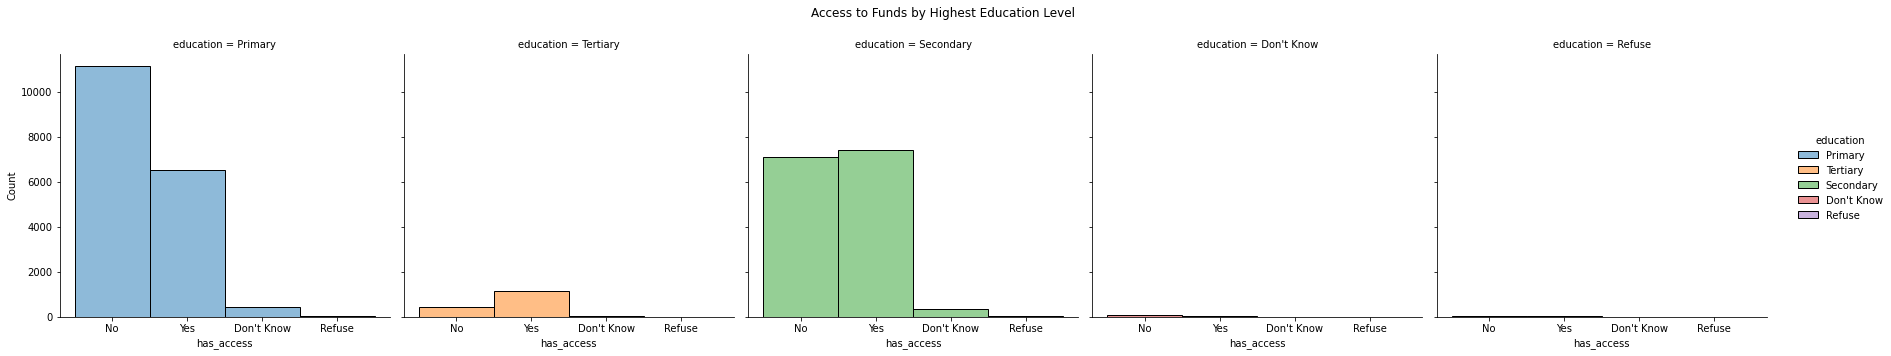

In [6]:
#@title Edcuation & Access

educ_access = sns.displot(x="has_access", hue= "education", col= "education", data=dem_df)

educ_access.fig.subplots_adjust(top=.85)
educ_access.fig.suptitle('Access to Funds by Highest Education Level')


Text(0.5, 0.98, 'Access to Funds by Highest Education Level')

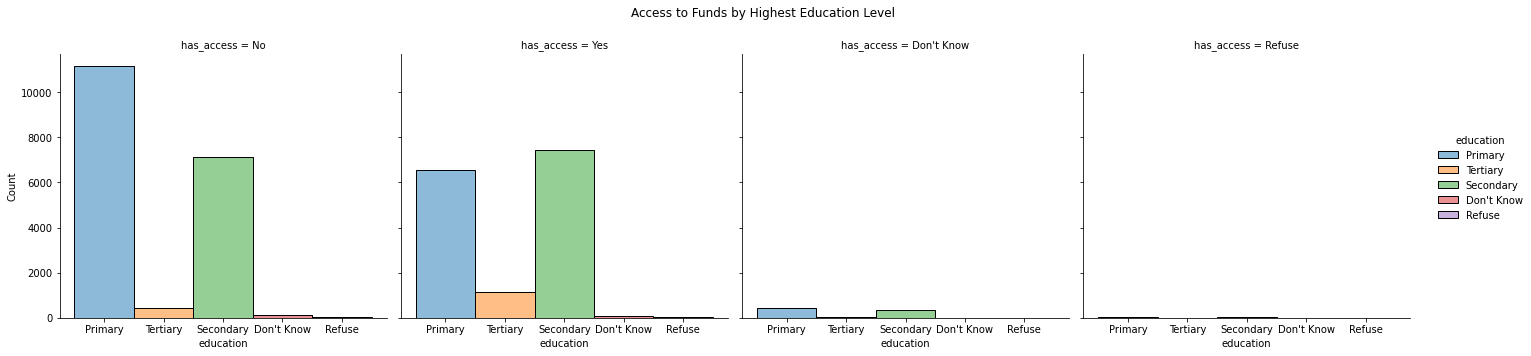

In [7]:
#@title Edcuation & Access - flipped

educ_access2 = sns.displot(x="education", hue= "education", col= "has_access", data=dem_df)

educ_access2.fig.subplots_adjust(top=.85)
educ_access2.fig.suptitle('Access to Funds by Highest Education Level')

PRIMARY EDUCATION - there are more people (most people - these people - people with only a **PRIMARY** education make up majorirty of the population) with only a primary education **DO NOT** have access to funds. 

SECONDARY EDUCATION - slightlty more people with a secondary educatio have access to funds compared to those who do not. There are also more people seoncdary education people with access to funds than primary education people with access. However, there are more primary education people WITHOUT access than secondary people without access. 

TERTIARY - There are not a lot of people with a third level of education. However, it seems that more people with  Tertiary level of education have access to funds than not. 

Overall, it would initially look like popele with a secondary education have the most access to funds, however, this may only be due to the fact that there are not a lot of people with a Tertiary education. I think that people with a tertiary education are still the people with the most access, (since the gap between no and yes is bigger). 
  - i would like to get a look at percentages of eacch population to be sure and have exact numbers. maybe. - 

- it is clear that the portion of the population with only a primary education has the least access to funds.

Text(0.5, 0.98, 'National ID by Highest Education Level')

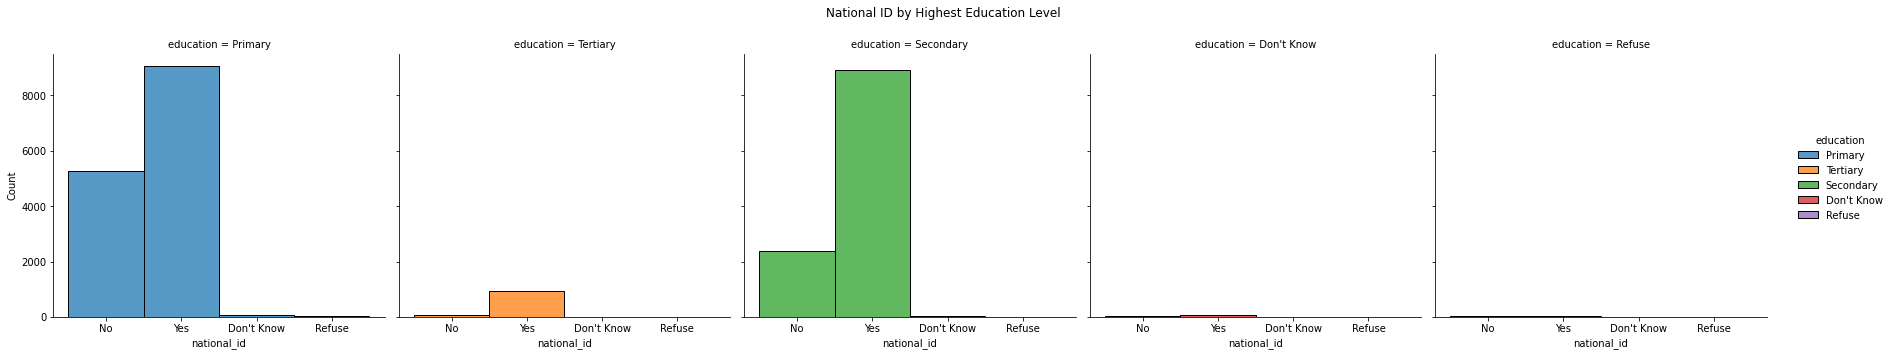

In [8]:
#@title Education Compared to NationalID

educ_nID = sns.displot(x= "national_id", hue= "education", multiple="stack", col= "education", data=dem_df)

educ_nID.fig.subplots_adjust(top=.85)
educ_nID.fig.suptitle('National ID by Highest Education Level')

It seems most people do  have a national ID. However, out of those who do not have a national id, most of them only have a primary level of education. Out of the people with a **primary** education a little more than **1/3** do not have a National ID. For those with a **secondary** education, about **1/4** of them do not have a national ID. For those with a **Tertiary** education, **almost all** of them have a national ID. 

Text(0.5, 0.98, 'Access to Funds by National ID')

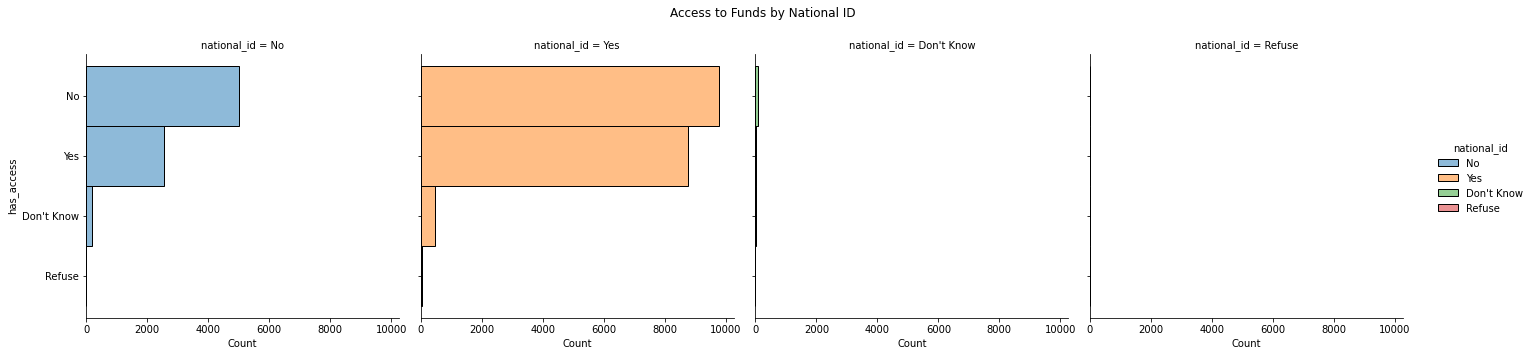

In [9]:
#@title National_ID & Access

nID_access = sns.displot(y="has_access", hue= "national_id", col= "national_id", data=dem_df)

nID_access.fig.subplots_adjust(top=.85)
nID_access.fig.suptitle('Access to Funds by National ID')

NO NATIONAL ID - out of the people without a national id, most of them do not have access to emergency funds. However, about 1/3 of the people without an ID still have access to emergency funds. 


NATIONAL ID - For the people with a national ID, about half have access to emergency funds and the other half do not. 

I think it's important to note that for the people with a national id whether or not having access to funds is 50/50, so it seems like its up to chance. However, with the portion of the population without an ID it seems like more do not have access than those who do which leads me to believ that **NOT HAVING A NATIONAL ID** is a significant barrier to having access to funds. 

Text(0.5, 0.98, 'Access to Funds by Gender')

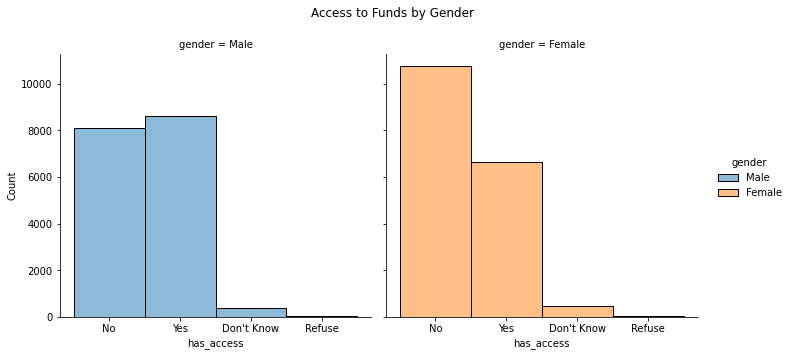

In [10]:
#@title Gender & Access

gender_access = sns.displot(x="has_access", col= "gender", hue= "gender", data=dem_df)

gender_access.fig.subplots_adjust(top=.85)
gender_access.fig.suptitle('Access to Funds by Gender')

- More males have access to funds than those who do not, but the differnce is not too large. 

- However, there are a lot more females **without** access to emergency funds than females with access. This leads me to believe that women are at a significant disadvantage when attmepting to access emergency funds, compared to men. 

Text(0.5, 0.98, 'Access to Funds by Age')

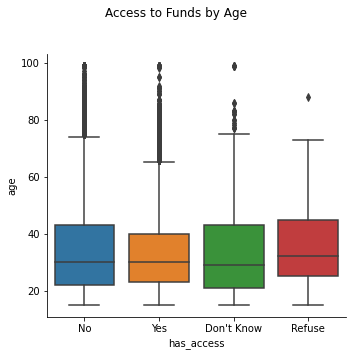

In [11]:
#@title Age & Access

age_access = sns.catplot(x="has_access", y= "age", data=dem_df, kind="box")

age_access.fig.subplots_adjust(top=.85)
age_access.fig.suptitle('Access to Funds by Age')

Text(0.5, 0.98, 'Access to Funds by Age')

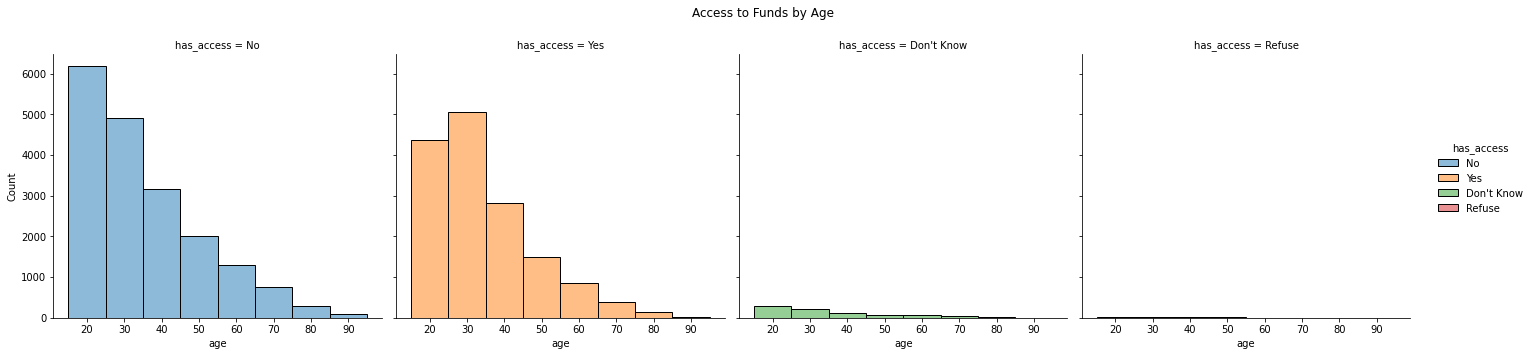

In [12]:
#@title Age & Access option 2

age_access2 = sns.displot(x= "age", col= "has_access", hue="has_access", bins = [15,25,35,45,55,65,75,85,95], data=dem_df)

age_access2.fig.subplots_adjust(top=.85)
age_access2.fig.suptitle('Access to Funds by Age')

NO ACCESS - Most of the people without access to emergency funds seem to be between the ages of 15-25. As the population's age inceases, there are less people without access. 


ACCESS - The age range with the most access to energency funds are people between 26-35. Those between 15-25 were the group with the second highest access to funds. After this, as age increases, there is less access to emergency funds. 


DONT KNOW - I found it interesting/funny how majority of the people who werent sure if the had access to emergency funds were on the younger side (15-25). Because as someone within that age range, I would also not know. 

In [ ]:
#@title Questions

- **Does the dataset contain all possible instances or is it a sample (not necessarily random) of instances from a larger set?**

This dataset contains information/data on global access to financial services from payments to savings and borrowing. This dataset only contains data from 35 countries, and it is a sample of a larger dataset that contains information from a larger geographic area. The complete dataset has data from about 140 countries. 


- **If the dataset is a sample, then what is the larger set? Is the sample representative of the larger set (e.g., geographic coverage)?**

I believe the sample is not representative of the complete dataset since each country from the sample has different economies. There is no feasible way for data on one country’s economy to be representative of another country’s due to the fact that their economies are most likely structured differently and their populations are different. However, because we are not looking to analyze the data from all countries and are only looking at countries in the Subsaharan African region, we do not need the smaller dataset we are working with to be representative of the larger one. We only need our dataset to be representative of the economy of each country we choose to analyze, which it is.


- **What (other) tasks could the dataset be used for?**

We could always filter the larger dataset by region or other variables in order to gain insight into the financial behaviors of each region’s population. After that, it could be useful to compare the results from each region in order to discern which strategies could best be implemented in each economy in order to encourage the use and access to financial resources. Additionally, if we could identify the issues within each economy, we could raise awareness of the inequities faced by those who are poor and underprivileged and begin to look for solutions to these issues. 
